**Cohort analysis**

Cohort analysis involves dividing users into distinct groups, or cohorts, based on certain criteria. In this case study, these cohorts are defined by the time of user acquisition. By grouping users together based on time of acquisition, we can study how different cohorts behave in terms of engagement and retention.

For example, you might create cohorts based on the month users first signed up for your service. You can then track how each cohort's activity, such as their conversion rate or lifetime value, evolves over time. This approach allows you to identify trends, anomalies, and areas where you may need to make adjustments to improve user retention and satisfaction.

**Retention Rate Time-Based Cohort Analysis:**

Retention rate time-based cohort analysis is a specialized form of cohort analysis that focuses on the retention of users over multiple time periods.

To perform retention rate time-based cohort analysis, you would typically:

- Create cohorts based on user acquisition dates.

- Measure the percentage of users from each cohort who continue to engage with your product or service over time (e.g., after 1 month, 3 months, etc.).

- Analyze how retention rates vary across different cohorts and time periods, enabling you to identify trends and make data-driven decisions.

This analysis can reveal whether certain cohorts have better or worse retention rates, helping the business understand the factors contributing to user retention or attrition. It can also assist in optimizing marketing, product development, and customer support strategies.

# Import libraries

In [486]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.ticker import FuncFormatter

In [487]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load and prepare dataset

In [488]:
data = pd.read_csv('/content/drive/MyDrive/Dataset_ecommerce.csv')


In [489]:
data.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [490]:
data.describe()

,CustomerID,Quantity,UnitPrice
count,406829.000000,541909.000000,541909.000000
mean,15287.690570,50.534748,50.476354
std,1713.600303,28.849367,28.564775
min,12346.000000,1.000000,1.000000
25%,13953.000000,26.000000,25.750000
50%,15152.000000,51.000000,50.430000
75%,16791.000000,76.000000,75.180000
max,18287.000000,100.000000,100.000000


In [491]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   InvoiceDate  541909 non-null  object 
 2   CustomerID   406829 non-null  float64
 3   StockCode    541909 non-null  object 
 4   Description  541909 non-null  object 
 5   Quantity     541909 non-null  int64  
 6   UnitPrice    541909 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [492]:
data.isnull().sum()

,0
InvoiceNo,0
InvoiceDate,0
CustomerID,135080
StockCode,0
Description,0
Quantity,0
UnitPrice,0
Country,0


In [493]:
# Drop missing columm
data.dropna(inplace = True)

#we can only track the activities of customers that are known (those with customerID)

In [494]:
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])

# Exploratory data analysis

## Analysis by country

**Bivariate analysis of countries and total number of purchase**

In [495]:
quantity_per_country = data.groupby(["Country"])["Quantity"].sum().reset_index()
quantity_per_country = quantity_per_country.sort_values("Quantity", ascending = False).reset_index()

In [496]:
quantity_per_country.head(3)

,index,Country,Quantity
0,23,Togo,741223
1,20,South Africa,740589
2,4,Cote d'Ivoire,740229


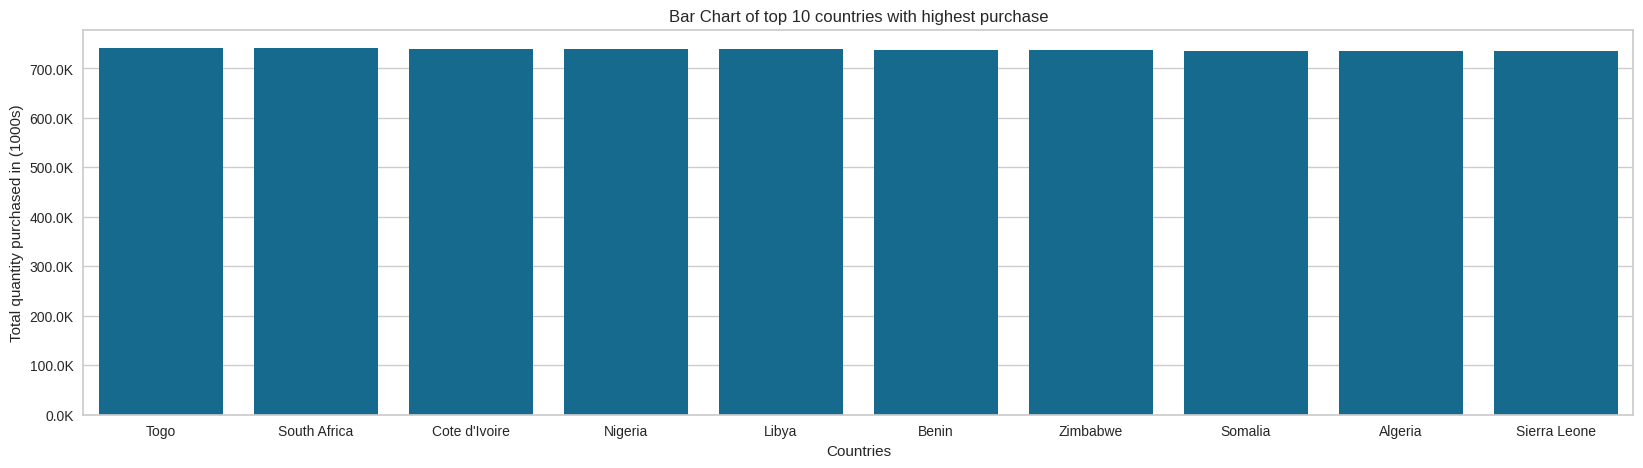

In [497]:
# Draw a plot of top 10 countries with highest number of quantity purchase
top_10_countries = quantity_per_country.head(10)

# Create a bar chart from the selected data
plt.figure(figsize=(20, 5))

y_format = FuncFormatter(lambda x, _: f'{x / 1000:.1f}K')
ax = sns.barplot(x='Country', y='Quantity', data= top_10_countries)
ax.yaxis.set_major_formatter(y_format)

plt.xlabel('Countries')
plt.ylabel('Total quantity purchased in (1000s)')
plt.title('Bar Chart of top 10 countries with highest purchase')
plt.show()

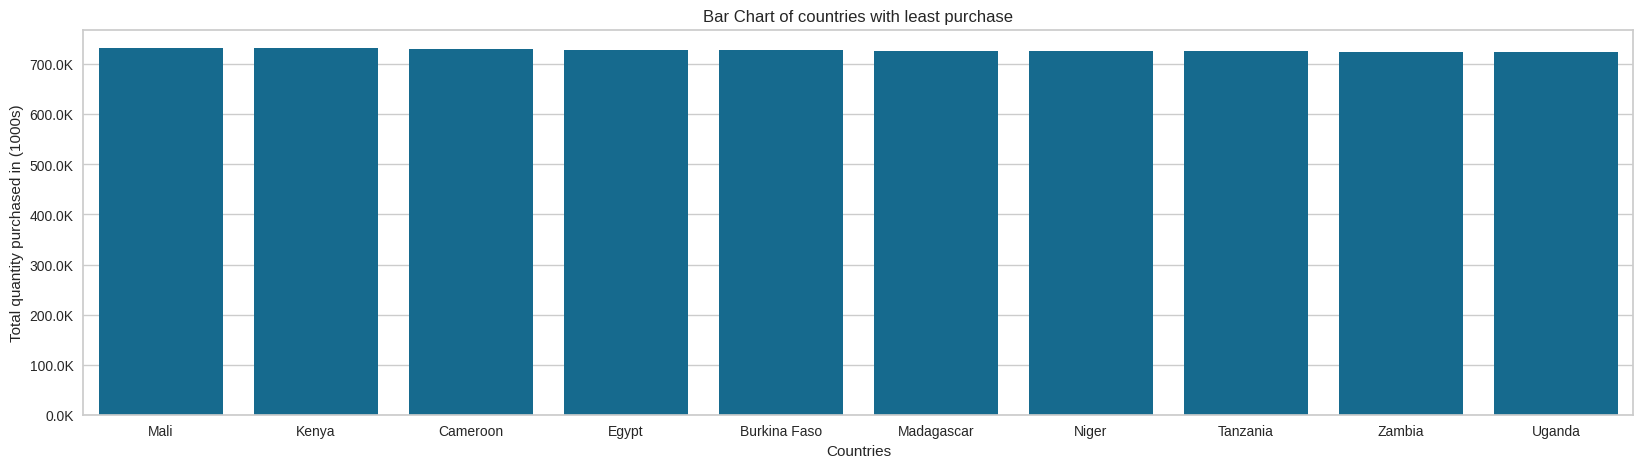

In [498]:
# Draw a plot of 10 countries with least number of quantity purchase
least_10_countries = quantity_per_country.tail(10)

# Create a bar chart from the selected data
plt.figure(figsize=(20, 5))

#y_format = FuncFormatter(lambda x, _: f'{x / 1000:.1f}K')
ax = sns.barplot(x='Country', y='Quantity', data= least_10_countries)
ax.yaxis.set_major_formatter(y_format)

plt.xlabel('Countries')
plt.ylabel('Total quantity purchased in (1000s)')
plt.title('Bar Chart of countries with least purchase')
plt.show()

**Bivariate analysis of countries and number of customers**

In [499]:
country_to_customers = data.groupby(["Country"])["CustomerID"].nunique().reset_index()
country_to_customers = country_to_customers.sort_values("CustomerID", ascending = False).reset_index()
country_to_customers.rename(columns = {"CustomerID" : "Number of customers"}, inplace = True)

In [500]:
country_to_customers.head(3)

,index,Country,Number of customers
0,13,Mozambique,3072
1,1,Benin,3054
2,23,Togo,3053


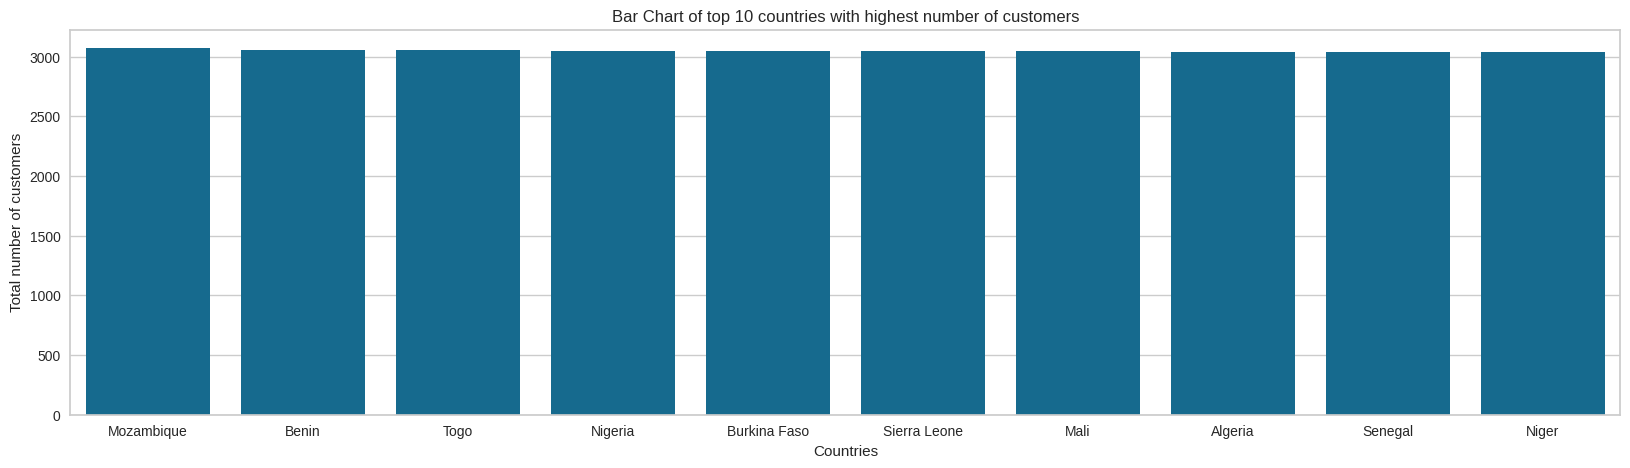

In [501]:
# Draw a plot of top 10 countries with highest number of customers (unique customerID)
top_countries_to_customers = country_to_customers.head(10)

# Create a bar chart from the selected data
plt.figure(figsize=(20, 5))

sns.barplot(x='Country', y='Number of customers', data= top_countries_to_customers)

plt.xlabel('Countries')
plt.ylabel('Total number of customers')
plt.title('Bar Chart of top 10 countries with highest number of customers')
plt.show()

## Sales trend

In [502]:
# Group the data by month and calculate the total monthly sales
monthly_sales = data.groupby(data['InvoiceDate'].dt.to_period('M'))['Quantity'].sum()

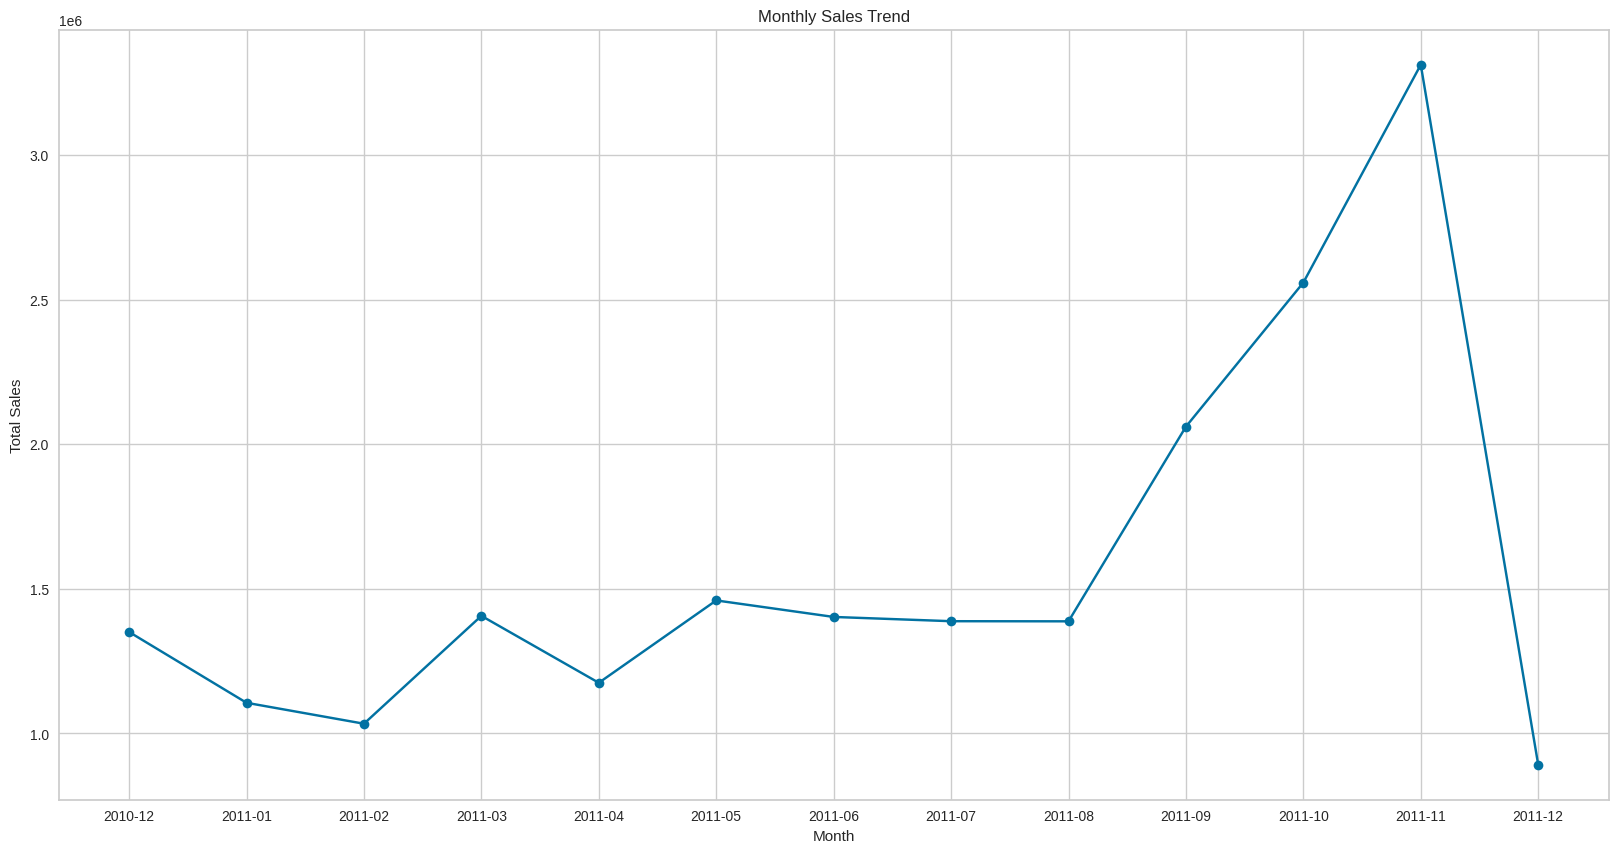

In [503]:
# Create a line chart
plt.figure(figsize=(20, 10))
plt.plot(monthly_sales.index.strftime('%Y-%m'), monthly_sales.values, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trend')
plt.grid(True)

# Display the plot
plt.show()


**Observations**

- December 2010 to August 2011: Noticeable fluctuations in sales quantity.
- August 2011 to November 2011: A significant sales increase occurred.
- November 2011 to December 2011: Sales experienced a sudden and substantial decline.

# Cohort Analysis

## create cohort date

Since we are carrying out a Time-based cohort analysis, the cohorts will be grouped according to the dates they made their first purchase

and Retention rate will be calculated by analysis the months they stayed active after their first purchase

In [504]:
#create Invoice month as new feature
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

In [505]:
data["InvoiceDate"]  = data["InvoiceDate"].apply(get_month)
data.tail()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
541904,581587,2011-12-01,12680.0,SC5440,Furniture,25,36.53,Mozambique
541905,581587,2011-12-01,12680.0,SC3576,Cloths,94,90.65,Tunisia
541906,581587,2011-12-01,12680.0,SC5283,Furniture,14,40.07,Somalia
541907,581587,2011-12-01,12680.0,SC1099,Cosmetics,45,79.83,Senegal
541908,581587,2011-12-01,12680.0,SC9276,Toys,6,46.62,Ethiopia


In [506]:
def get_cohort_date(data):
    """ this function takes in the dataframe
        and returns the cohort date

        variables:
        data = dataframe
        cohort date = the first date they made a purchase
        """

    # assign the minimum date to all unique candidateID, i.e the first day they made a purchase
    data["cohort date"] = data.groupby("CustomerID")["InvoiceDate"].transform("min")

    return data["cohort date"]

In [507]:
#apply the function created to our dataframe and extract the 2 newly created column

data["cohort date"] = get_cohort_date(data)

In [508]:
data

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,cohort date
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,2010-12-01
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,2010-12-01
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,2010-12-01
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,2010-12-01
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,2010-12-01
...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-01,12680.0,SC5440,Furniture,25,36.53,Mozambique,2011-08-01
541905,581587,2011-12-01,12680.0,SC3576,Cloths,94,90.65,Tunisia,2011-08-01
541906,581587,2011-12-01,12680.0,SC5283,Furniture,14,40.07,Somalia,2011-08-01
541907,581587,2011-12-01,12680.0,SC1099,Cosmetics,45,79.83,Senegal,2011-08-01


## create cohort index

A cohort index is a numerical representation that measures the time interval in months since a particular group (cohort) made their initial purchase. For example, an index of 4 indicates that this cohort made their first purchase four months ago.

This will be calculated by subtracing the time the customer made first purchase (cohort date) from the recent purchase time (invoice date)

In [509]:
#create a function that extracts the year and month from the first and last cohort date

def get_year_and_month(data, col):
    """
    This function takes in the dataframe and column,
    and returns the month and year component for that column

    Variables:
    data = dataframe
    col = column
    month = month component
    year = year component"""

    month = data[col].dt.month
    year = data[col].dt.year
    return month, year

In [510]:
# apply the fucntion on cohort first date column
first_month, first_year = get_year_and_month(data,"cohort date")

In [511]:
first_month

,cohort date
0,12
1,12
2,12
3,12
4,12
...,...
541904,8
541905,8
541906,8
541907,8


In [512]:
# apply the fucntion on cohort latest date column
latest_month, latest_year = get_year_and_month(data,"InvoiceDate")

In [513]:
latest_month

,InvoiceDate
0,12
1,12
2,12
3,12
4,12
...,...
541904,12
541905,12
541906,12
541907,12


**CREATE COHORT INDEX**

In [514]:
# write a function to create cohort index
def create_cohort_index(first_month, first_year, latest_month,latest_year):
    """
    This code creates takes in the first and latest month and year
    and returns the calculated period(in months) the customer has been active

    variables:
    first_month: first month the customer made purchase
    first_year: first year the customer made purchase

    latest_month: recent month the customer made purchase
    latest_year: recent year the customer made purchase

    index: The duration between first and latest purchase (in months)"""

    year_diff = latest_year - first_year
    month_diff = latest_month - first_month
    index = year_diff*12 + month_diff +1 # +1 is added because of customers who have been active for just 1 month
    return index

In [515]:
data["cohort_index"] = create_cohort_index(first_month, first_year, latest_month, latest_year)

In [516]:
data

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,cohort date,cohort_index
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,2010-12-01,1
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,2010-12-01,1
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,2010-12-01,1
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,2010-12-01,1
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,2010-12-01,1
...,...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-01,12680.0,SC5440,Furniture,25,36.53,Mozambique,2011-08-01,5
541905,581587,2011-12-01,12680.0,SC3576,Cloths,94,90.65,Tunisia,2011-08-01,5
541906,581587,2011-12-01,12680.0,SC5283,Furniture,14,40.07,Somalia,2011-08-01,5
541907,581587,2011-12-01,12680.0,SC1099,Cosmetics,45,79.83,Senegal,2011-08-01,5


## Create a pivot table

To create a pivot table, first we need to know how many customers made a purchase each month after their first purchase

for example: How many customers from the September cohort made a purchase four months after their initial purchase in September?

### Cohort table

In [517]:
cohort_info = data.groupby(["cohort date","cohort_index"])["CustomerID"].nunique().reset_index()

In [518]:
cohort_info.rename(columns = {"CustomerID": "Number of customers"}, inplace = True)

In [519]:
cohort_info

,cohort date,cohort_index,Number of customers
0,2010-12-01,1,948
1,2010-12-01,2,362
2,2010-12-01,3,317
3,2010-12-01,4,367
4,2010-12-01,5,341
...,...,...,...
86,2011-10-01,2,93
87,2011-10-01,3,46
88,2011-11-01,1,321
89,2011-11-01,2,43


### Pivot table

In [520]:
# create a pivot table

cohort_table = cohort_info.pivot(index = "cohort date", columns = ["cohort_index"], values = "Number of customers")

#change index to understandable format
cohort_table.index = cohort_table.index.strftime('%B %Y')
cohort_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort date,,,,,,,,,,,,,
December 2010,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
January 2011,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
February 2011,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
March 2011,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
April 2011,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
May 2011,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
June 2011,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='cohort_index', ylabel='cohort date'>

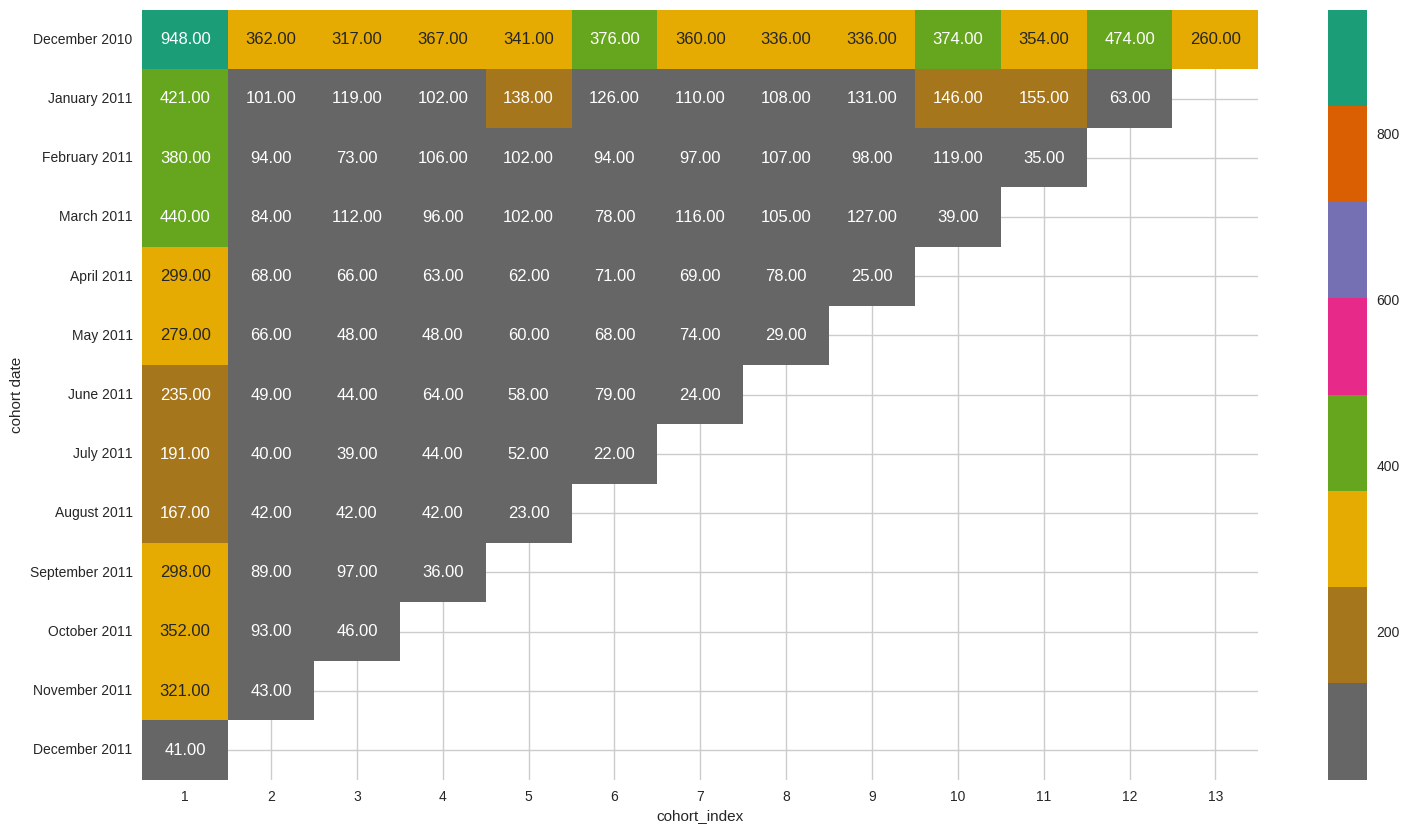

In [521]:
#visualize our results in heatmap

plt.figure(figsize = (18,10))
sns.heatmap(cohort_table, annot = True, cmap = 'Dark2_r',fmt = ".2f")

**Observe retention rate**

To effeciently observe the customers rentention rate, lets plot the chart in percentage.

In [522]:
# showing retention rate in percentage
new_cohort_table = cohort_table.divide(cohort_table.iloc[:,0], axis = 0)
new_cohort_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort date,,,,,,,,,,,,,
December 2010,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
January 2011,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
February 2011,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
March 2011,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
April 2011,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
May 2011,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
June 2011,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Draw heatmap**

<Axes: xlabel='cohort_index', ylabel='cohort date'>

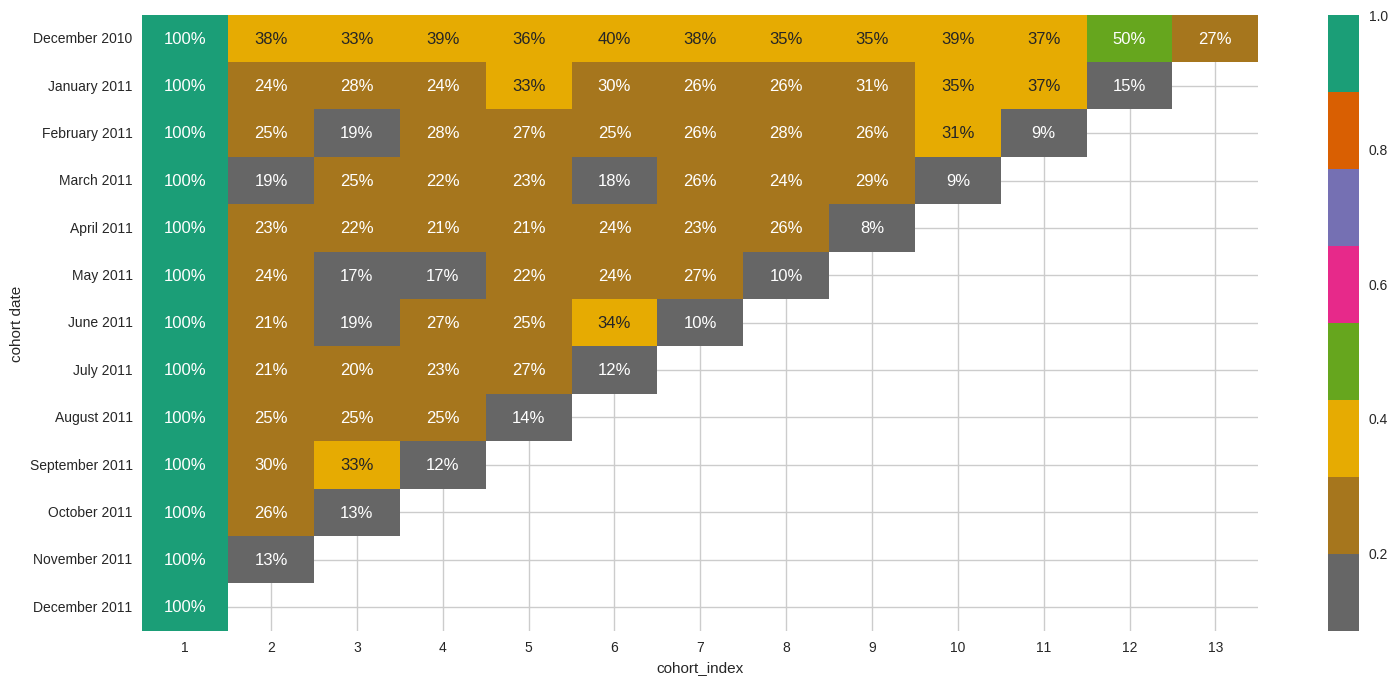

In [523]:
#visualize our results in heatmap

plt.figure(figsize = (18,8))
sns.heatmap(new_cohort_table, annot = True, cmap = 'Dark2_r', fmt = '.0%')

The heatmap above illustrates the customer retention rates for each cohort.

**OBSERVATIONS**

A healthy retention rate for e-commerce platforms is typically considered to be in the range of **20% to 40%.** This means that **20% to 40%** of your customers continue to make purchases from your e-commerce platform after their initial purchase.

- **December 2010 Cohort Outperforms Others:** The fact that the **December 2010** cohort has a retention rate above **30%** is a positive sign. It suggests that this group of customers has remained engaged with your e-commerce platform over time. This could be due to various factors, such as the quality of your products/services, effective marketing, or a strong customer retention strategy.

- **Decline in December 2011:** The observation that all cohorts have low retention rates in December 2011 suggests that there may have been specific challenges or issues affecting customer retention during that time. It's important to investigate what might have caused this decline and whether it's a one-time event or a recurring pattern

- **Variability in Retention Rates:** The range of retention rates, from a **minimum of 8% to a maximum of 50%**, suggests that there is significant variability in how different cohorts of customers are behaving. While 8% is relatively low, 50% is relatively high, considering the standard e-commerce retention rates mentioned earlier.

**RECOMMENDATIONS**

- **Identify Factors Driving High Retention (December 2010):** Analyze what factors have contributed to the high retention rate for the December 2010 cohort. Was there a specific marketing campaign, product improvement, or customer engagement strategy that worked well for this group? Try to replicate successful strategies for other cohorts.

- **Investigate December 2011 Drop:** Investigate why all cohorts have low retention rates on December 2011. It might involve analyzing customer feedback, product quality, customer service, or any changes in your business operations during that time. Identifying and addressing the root causes of this drop is crucial for improving future retention rates.

- **Set Realistic Targets:** While the standard e-commerce retention rate range is 20% to 40%, it's essential to set targets that are specific to your business and its circumstances. Aim to improve retention rates gradually over time based on your historical data and industry benchmarks.

- **Implement Retention Strategies:** Develop and implement retention strategies that are tailored to different cohorts of customers. Personalized marketing, loyalty programs, and targeted communication can help improve retention rates.

- **Continuously Monitor and Adapt:** Retention rates can change over time due to various factors, so it's crucial to continuously monitor them and adapt your strategies accordingly. Regularly analyzing cohort data and customer behavior will help you make informed decisions to improve retention.

In addtion to observing the behaviour of each cohort, we can create a table which shows the average quantity of product bought by each cohort and how it fluctuates.

**Average quantity bought**

In [524]:
average_quantity = data.groupby(["cohort date", "cohort_index"])["Quantity"].mean().reset_index()
average_quantity["Quantity"] = average_quantity["Quantity"].round(1)

In [525]:
average_quantity.rename(columns = {"Quantity": "average quantity"}, inplace = True)

In [526]:
average_quantity

,cohort date,cohort_index,average quantity
0,2010-12-01,1,50.3
1,2010-12-01,2,50.3
2,2010-12-01,3,50.4
3,2010-12-01,4,50.6
4,2010-12-01,5,50.6
...,...,...,...
86,2011-10-01,2,49.9
87,2011-10-01,3,49.4
88,2011-11-01,1,51.1
89,2011-11-01,2,48.6


In [527]:
# create a pivot table

quantity_table = average_quantity.pivot(index = "cohort date", columns = ["cohort_index"], values = "average quantity")

#change index to understandable format
quantity_table.index = quantity_table.index.strftime('%B %Y')
quantity_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort date,,,,,,,,,,,,,
December 2010,50.3,50.3,50.4,50.6,50.6,50.4,50.5,50.5,50.2,50.6,50.5,50.6,50.7
January 2011,50.7,50.6,50.8,50.6,50.9,50.4,50.3,50.4,50.5,49.9,50.6,50.5,NaN
February 2011,51.2,49.7,51.0,50.3,50.2,50.7,49.2,50.7,50.9,49.6,50.1,NaN,NaN
March 2011,50.5,50.2,50.2,50.2,50.1,50.6,50.0,51.1,50.1,50.4,NaN,NaN,NaN
April 2011,50.7,49.9,50.0,50.1,50.6,50.3,50.3,49.9,51.1,NaN,NaN,NaN,NaN
May 2011,50.7,49.4,50.2,49.7,51.2,50.5,49.9,51.4,NaN,NaN,NaN,NaN,NaN
June 2011,50.6,51.0,48.5,50.6,51.4,50.9,50.3,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,50.7,49.5,50.8,50.1,49.8,50.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,50.5,49.8,50.4,51.0,50.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='cohort_index', ylabel='cohort date'>

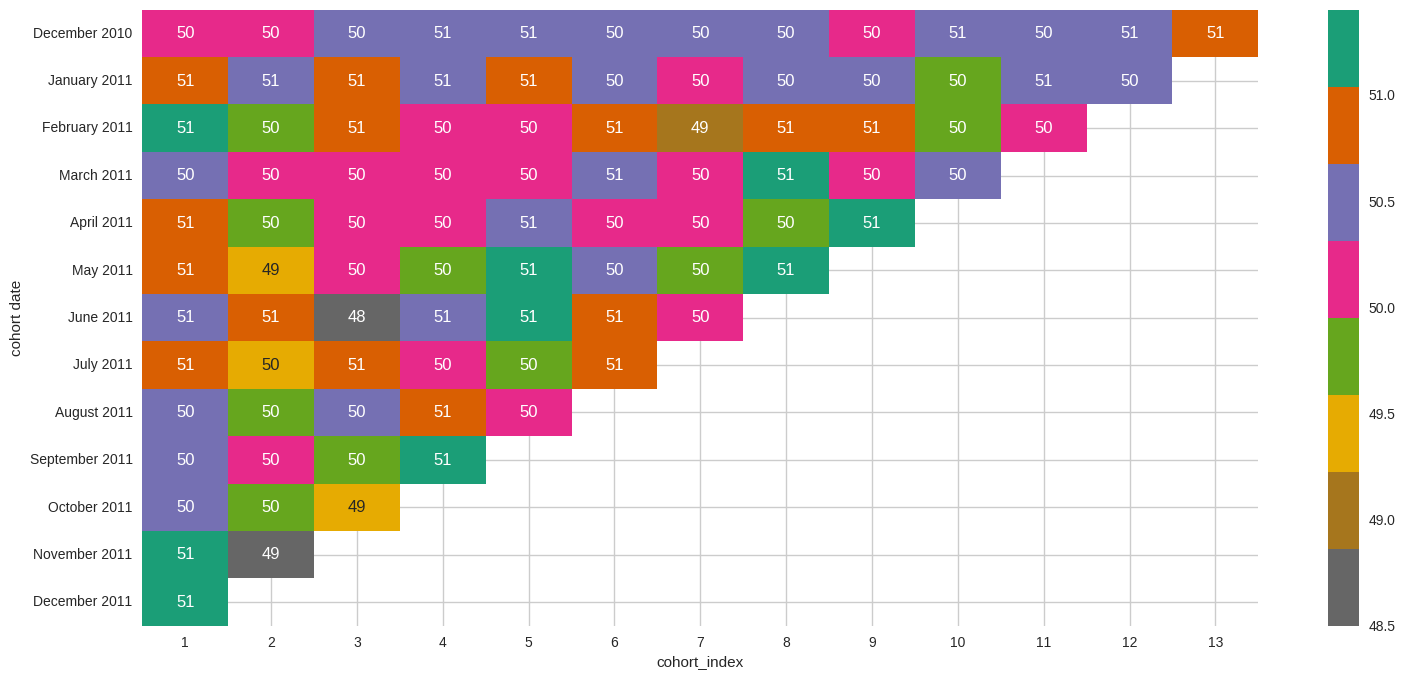

In [528]:
#visualize our results in heatmap

plt.figure(figsize = (18,8))
sns.heatmap(quantity_table, annot = True, cmap = 'Dark2_r')

In [529]:
# Determine the CohortMonth (the first month a customer made a purchase)
data['cohort date'] = data.groupby('CustomerID')['InvoiceDate'].transform('min')

In [530]:
# Add segmentation columns
data['AcquisitionYear'] = data['cohort date'].dt.year
data['AcquisitionMonth'] = data['cohort date'].dt.month

In [531]:
# Summarize cohort segmentation
cohort_summary = data.groupby(['cohort date']).agg(
    CustomerCount=('CustomerID', 'nunique'),
    TotalQuantity=('Quantity', 'sum'),
    TotalRevenue=('Quantity', lambda x: (x * data['UnitPrice']).sum()),
).reset_index()

<ipython-input-532-f514437aaaf6>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




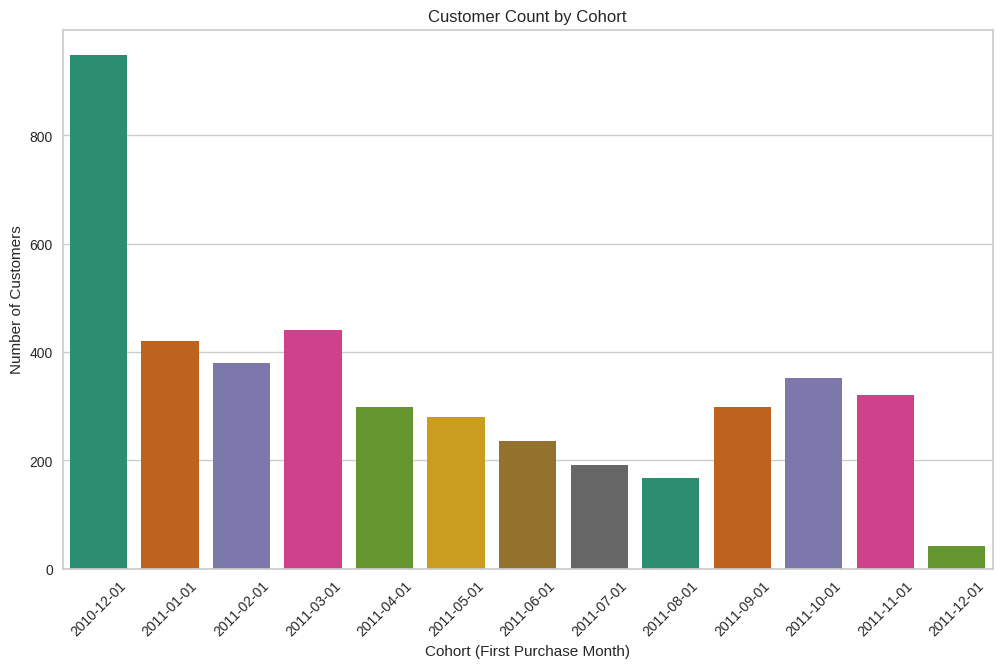

In [532]:
# Visualize the segmentation
plt.figure(figsize=(12,7))
sns.barplot(data=cohort_summary, x="cohort date", y="CustomerCount", palette="Dark2")
plt.title("Customer Count by Cohort")
plt.xlabel("Cohort (First Purchase Month)")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()

In [533]:
# Calculate retention rates
cohort_size = cohort_table.iloc[:, 0]  # Size of each cohort
retention_rates = cohort_table.divide(cohort_size, axis=0)

In [534]:
# Identify retention trends
retention_trends = retention_rates.mean(axis=0)  # Average retention over all cohorts


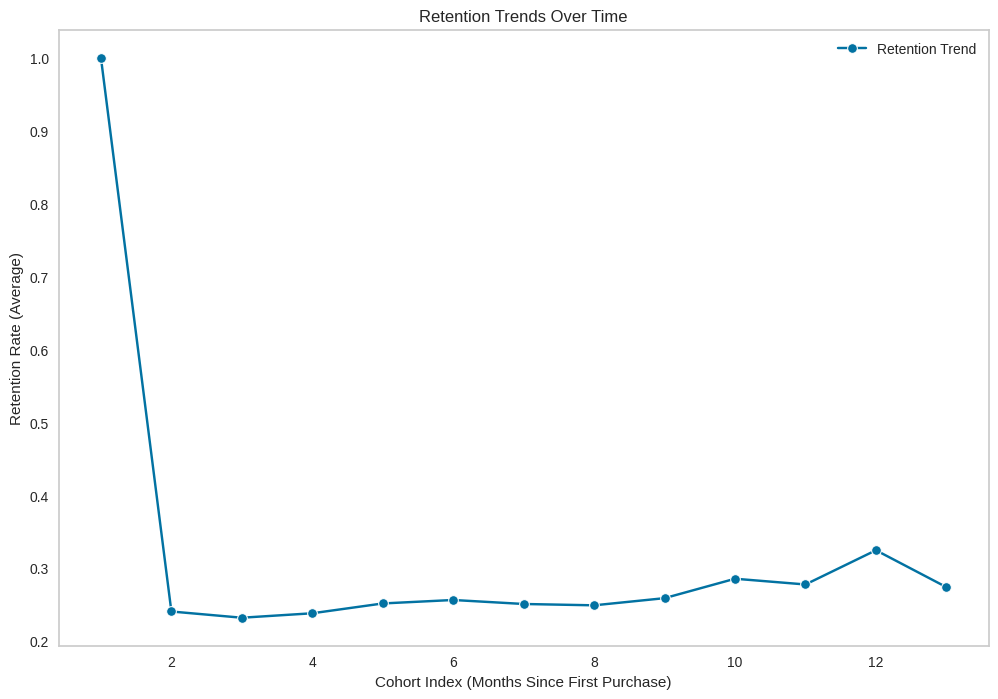

In [535]:
# Visualize retention trends over time
plt.figure(figsize=(12, 8))
sns.lineplot(data=retention_trends, marker="o", label="Retention Trend")
plt.title("Retention Trends Over Time")
plt.xlabel("Cohort Index (Months Since First Purchase)")
plt.ylabel("Retention Rate (Average)")
plt.grid()
plt.legend()
plt.show()

In [536]:
# Create new TotalPrice column
data['TotalValue'] = data['Quantity'] * data['UnitPrice']

**Observations**

Although there is significant drop in customer retention after their first month as observed on the previous chart, the average quantity bought is not experiencing much fluctuations. Meaning there is possibiity that a few customers tends to puchase alot of product, therefore maintaining the average value

**Recommendation**

This can serve as a signal to carryout targetted marketing in countries where more quantites are sold in contrast to targeting countries where more customers are acquired.

##CUSTOMER SEGMENTATION

Define features using the RFM approach.

RFM is a method used for analyzing customer value and segmenting customers which is commonly used in database marketing and direct marketing

RFM stands for the three dimensions:

 * Recency – How recently did the customer purchase?

 * Frequency – How often do they purchase?

 * Monetary Value – How much do they spend?

In [537]:
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
import plotly.graph_objects as go
from sklearn.metrics import silhouette_score

In [538]:
# Define features using the RFM approach.
anchorDate = dt.datetime(2011,12,10)
data['TotalValue'] = data['Quantity']*data['UnitPrice']
rfm=data.groupby('CustomerID').agg({'InvoiceDate': lambda x: (anchorDate-x.max()).days,
                                       'InvoiceNo': lambda x: len(x),
                                       'TotalValue': lambda x: x.sum()})
rfm= rfm.rename(columns={'InvoiceDate':'Recency', 'InvoiceNo':'Frequency', 'TotalValue':'Monetary'})

In [539]:
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,343,2,5342.40
12347.0,9,182,431501.00
12348.0,100,31,82378.47
12349.0,39,73,176075.12
12350.0,312,17,48173.37


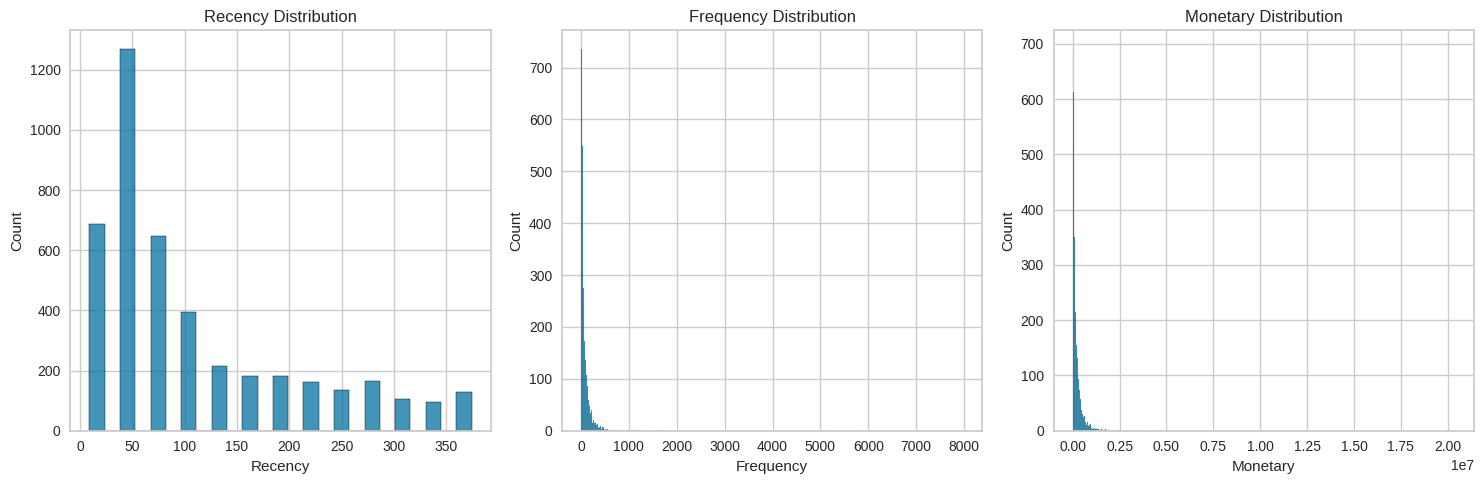

In [541]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot Recency distribution
sns.histplot(rfm['Recency'], ax=axes[0])
axes[0].set_title('Recency Distribution')

# Plot Frequency distribution
sns.histplot(rfm['Frequency'], ax=axes[1])
axes[1].set_title('Frequency Distribution')

# Plot Monetary distribution
sns.histplot(rfm['Monetary'], ax=axes[2])
axes[2].set_title('Monetary Distribution')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

All three features are right-skewed, with particularly large values in Frequency and Monetary. When using distance-based models such as KMeans, these large values can skew the model results, as KMeans relies on Euclidean distance. A good practice is to apply a logarithmic transformation to these features.



In [542]:
# Apply logarithmic transformation
rfm['Recency_log'] = np.log(rfm['Recency'] + 1)
rfm['Frequency_log'] = np.log(rfm['Frequency'] + 1)
rfm['Monetary_log'] = np.log(rfm['Monetary'] + 1)

Logarithmic transformation can help bring the data closer to a normal distribution, potentially leading to better results by reduce the skewness of data, especially when dealing with right-skewed distributions like Recency, Frequency, and Monetary.

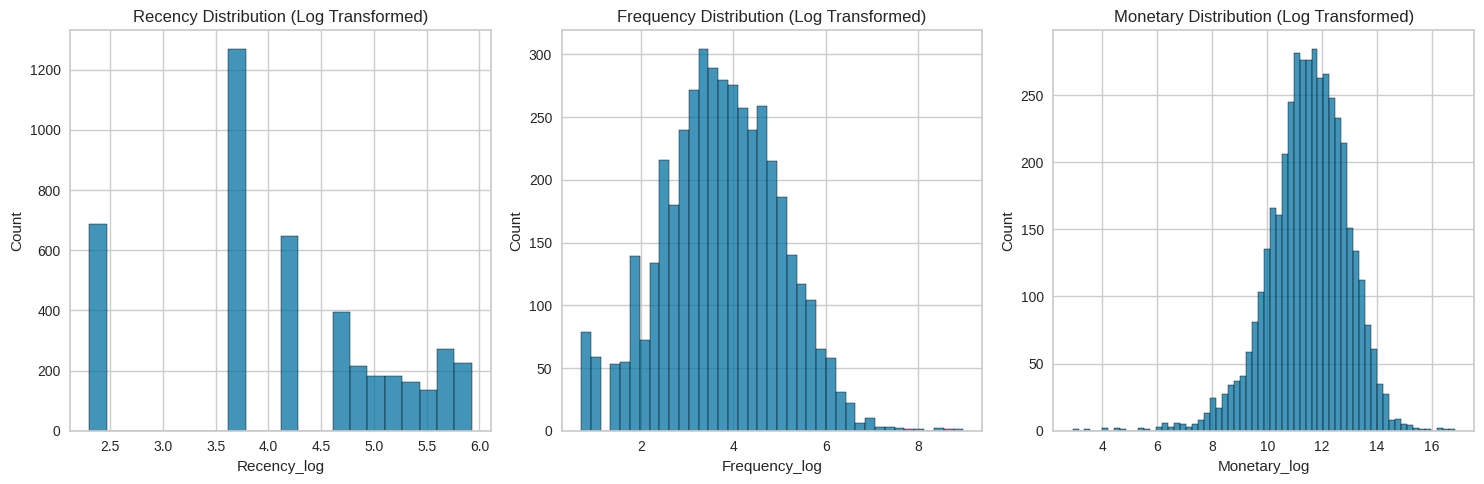

In [543]:

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot Recency_log distribution
sns.histplot(rfm['Recency_log'], ax=axes[0])
axes[0].set_title('Recency Distribution (Log Transformed)')

# Plot Frequency_log distribution
sns.histplot(rfm['Frequency_log'], ax=axes[1])
axes[1].set_title('Frequency Distribution (Log Transformed)')

# Plot Monetary_log distribution
sns.histplot(rfm['Monetary_log'], ax=axes[2])
axes[2].set_title('Monetary Distribution (Log Transformed)')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

After taking the logarithm, the distributions are close to normal and their scales are the same.

In [544]:
rfm['log_Recency'] = np.log1p(rfm['Recency'])
rfm['log_Frequency'] = np.log1p(rfm['Frequency'])
rfm['log_Monetary'] = np.log1p(rfm['Monetary'])

rfm.head()

,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,log_Recency,log_Frequency,log_Monetary
CustomerID,,,,,,,,,
12346.0,343,2,5342.40,5.840642,1.098612,8.583617,5.840642,1.098612,8.583617
12347.0,9,182,431501.00,2.302585,5.209486,12.975027,2.302585,5.209486,12.975027
12348.0,100,31,82378.47,4.615121,3.465736,11.319092,4.615121,3.465736,11.319092
12349.0,39,73,176075.12,3.688879,4.304065,12.078672,3.688879,4.304065,12.078672
12350.0,312,17,48173.37,5.746203,2.890372,10.782582,5.746203,2.890372,10.782582


In [545]:
rfm.describe()

,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,log_Recency,log_Frequency,log_Monetary
count,4372.000000,4372.000000,4.372000e+03,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000
mean,106.416514,93.053294,2.372909e+05,4.182350,3.742564,11.498090,4.182350,3.742564,11.498090
std,101.044984,232.471608,5.944603e+05,1.074950,1.262752,1.420024,1.074950,1.262752,1.420024
min,9.000000,1.000000,1.736000e+01,2.302585,0.693147,2.910174,2.302585,0.693147,2.910174
25%,39.000000,17.000000,4.350893e+04,3.688879,2.890372,10.680744,3.688879,2.890372,10.680744
50%,70.000000,42.000000,1.066925e+05,4.262680,3.761200,11.577716,4.262680,3.761200,11.577716
75%,162.000000,102.000000,2.599154e+05,5.093750,4.634729,12.468115,5.093750,4.634729,12.468115
max,374.000000,7983.000000,2.038383e+07,5.926926,8.985195,16.830253,5.926926,8.985195,16.830253


Kmeans

K-Means is a centroid-based clustering algorithm that partitions data into k clusters based on their distance from the mean (centroid) of each cluster.

In [546]:
#scaler = MinMaxScaler((0, 1))
data_rfm=np.array(rfm.loc[:,['log_Recency','log_Frequency','log_Monetary']])

In [547]:
from sklearn.cluster import MiniBatchKMeans
inertia_values = []
silhouette_values = []

for i in range(2, 11):
    kmeans =MiniBatchKMeans(n_clusters=i,batch_size=1000)
    kmeans.fit(data_rfm)

    inertia_values.append(kmeans.inertia_)

    # Calculate silhouette score
    score = silhouette_score(data_rfm, kmeans.labels_)
    silhouette_values.append(score)
    print(f'{i} cluster has a score is {score}')

2 cluster has a score is 0.4359494779898878
3 cluster has a score is 0.36425522514801806
4 cluster has a score is 0.30840380474844026
5 cluster has a score is 0.33058712933919226
6 cluster has a score is 0.31221992298975626
7 cluster has a score is 0.3470167365892778
8 cluster has a score is 0.3238521621222705
9 cluster has a score is 0.3530845800932447
10 cluster has a score is 0.36164074655695966


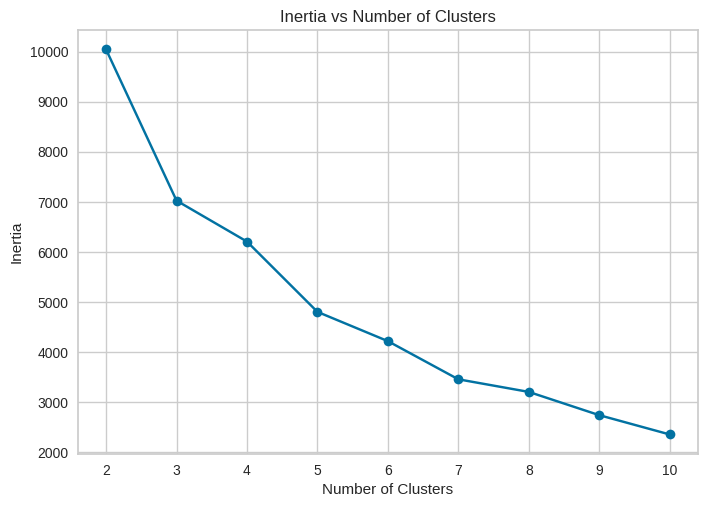

In [557]:
# Inertia Plot
plt.plot(range(2, 11), inertia_values, marker='o')
plt.title('Inertia vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

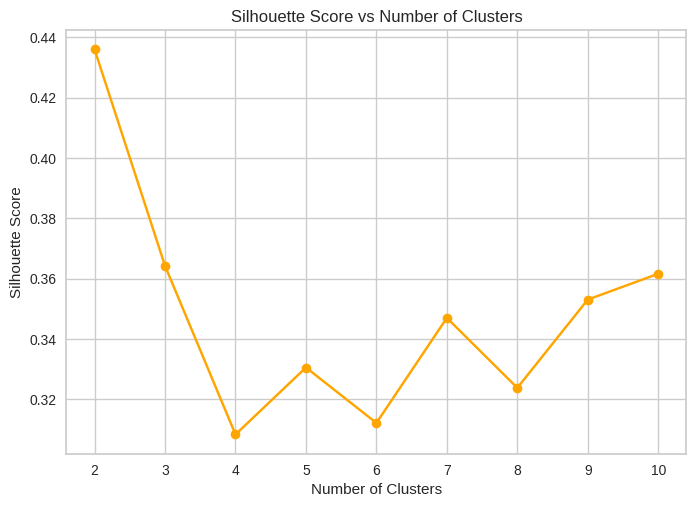

In [549]:
# Silhouette Score Plot
plt.plot(range(2, 11), silhouette_values, marker='o', color='orange')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

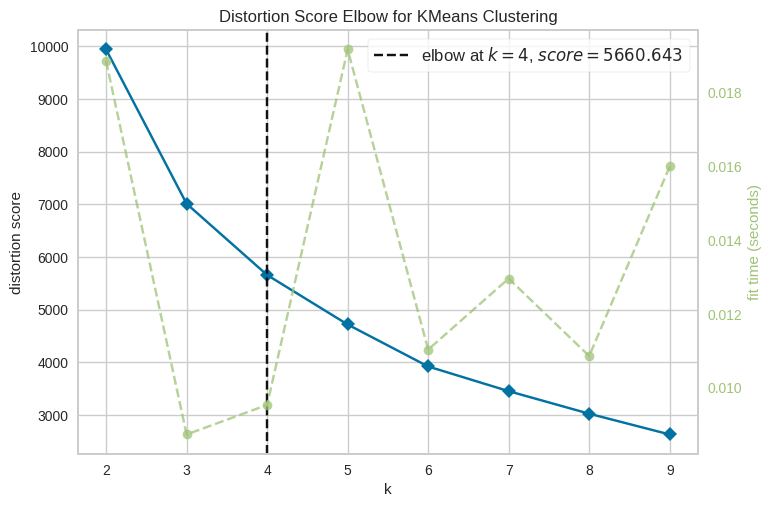

In [558]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10))

# Fit the data to the visualizer
visualizer.fit(data_rfm)
visualizer.show() # Finalize and render the figure
plt.show()

In [551]:
km_mdl = KMeans(n_clusters=4, random_state=32)

km = km_mdl.fit_predict(data_rfm)

In [552]:
# check the cluster array
np.unique(km)

array([0, 1, 2, 3], dtype=int32)

##Plot the cluster graph

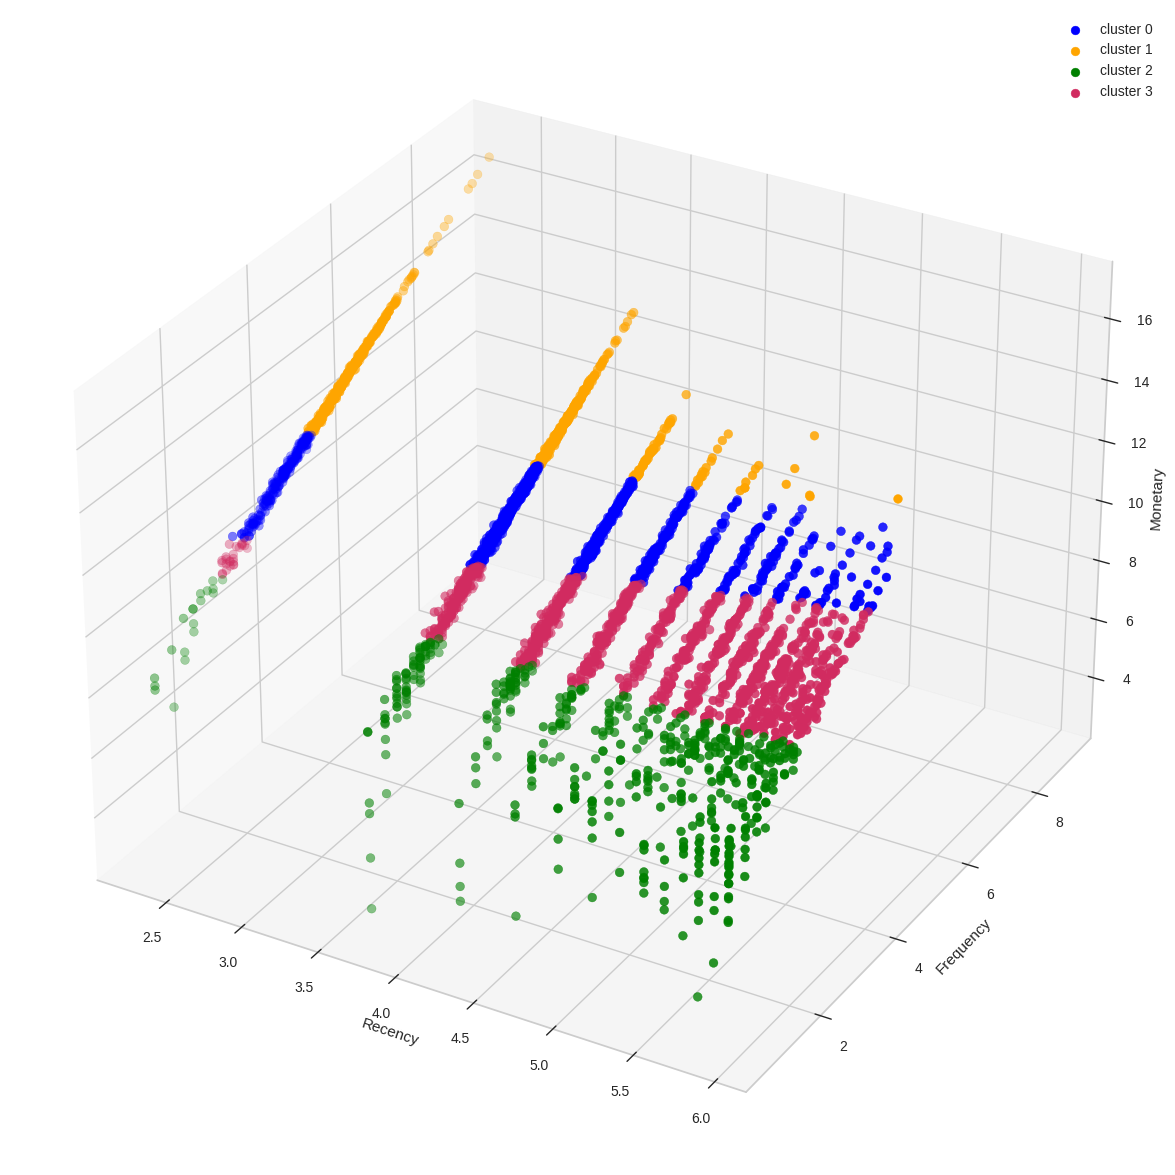

In [553]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_rfm[km == 0,0],data_rfm[km == 0,1],data_rfm[km == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(data_rfm[km == 1,0],data_rfm[km == 1,1],data_rfm[km == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(data_rfm[km == 2,0],data_rfm[km == 2,1],data_rfm[km == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(data_rfm[km == 3,0],data_rfm[km == 3,1],data_rfm[km == 3,2], s = 40 , color = '#D12B60', label = "cluster 3")
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.legend()
plt.show()


##Calculate Cluster Statistics


In [554]:
# Calculate the mean or median RFM values for each cluster.
rfm['Cluster'] = km

# Calculate mean RFM values for each cluster
cluster_means = rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()

# Calculate median RFM values for each cluster
cluster_medians = rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].median()

# Display the results
print("Cluster Means:\n", cluster_means)
print("\nCluster Medians:\n", cluster_medians)

Cluster Means:
             Recency   Frequency       Monetary
Cluster                                       
0         70.088026   70.414239  180401.797392
1         29.357060  307.786464  784689.793279
2        180.437859    4.688337   10744.762772
3        164.090532   21.986178   55712.702398

Cluster Medians:
          Recency  Frequency   Monetary
Cluster                               
0           39.0       64.0  164684.35
1           39.0      214.0  547510.40
2          162.0        5.0   10876.96
3          131.0       20.0   51222.82


#INTERPRETATION

##Cluster 0:
This cluster represents the loyal and high-value customers. They purchase frequently, have spent a considerable amount, and haven't been inactive for too long.

##Cluster 1:
 This cluster represent the most frequent and highest-spending customers, They purchase very often, recently, and spend a lot.

##Cluster 2:
This cluster represents the at-risk or churned customers. They have not purchased in a while, have a low purchase frequency, and haven't spent much overall.

##Cluster 3:
 This cluster represent occasional customers or customers who are losing engagement. They haven't purchased recently, but they have made some purchases in the past and spent a decent amount.

# In summary:

Cluster 0: Loyal, High-Value Customers

Cluster 1: Most Frequent, Highest-Spending

Cluster 2: At-Risk or Churned Customers

Cluster 3: Occasional or Losing Engagement